In [1]:
import os, sys
# sys.path.insert(1, '/Users/arcticfox/Documents/GitHub/stella/')
import stella
import numpy as np
from tqdm import tqdm_notebook
import matplotlib.pyplot as plt

%matplotlib inline
plt.rcParams['font.size'] = 20

2024-08-02 12:03:23.579719: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
ds = stella.DownloadSets()
ds.download_models()
MODELS = ds.models

Models have already been downloaded to ~/.stella/models


In [3]:
ds.models

array(['/Users/grant/.stella/models/hlsp_stella_tess_ensemblemodel_s004_tess_v0.1.0_cnn.h5',
       '/Users/grant/.stella/models/hlsp_stella_tess_ensemblemodel_s005_tess_v0.1.0_cnn.h5',
       '/Users/grant/.stella/models/hlsp_stella_tess_ensemblemodel_s018_tess_v0.1.0_cnn.h5',
       '/Users/grant/.stella/models/hlsp_stella_tess_ensemblemodel_s028_tess_v0.1.0_cnn.h5',
       '/Users/grant/.stella/models/hlsp_stella_tess_ensemblemodel_s029_tess_v0.1.0_cnn.h5',
       '/Users/grant/.stella/models/hlsp_stella_tess_ensemblemodel_s038_tess_v0.1.0_cnn.h5',
       '/Users/grant/.stella/models/hlsp_stella_tess_ensemblemodel_s050_tess_v0.1.0_cnn.h5',
       '/Users/grant/.stella/models/hlsp_stella_tess_ensemblemodel_s077_tess_v0.1.0_cnn.h5',
       '/Users/grant/.stella/models/hlsp_stella_tess_ensemblemodel_s078_tess_v0.1.0_cnn.h5',
       '/Users/grant/.stella/models/hlsp_stella_tess_ensemblemodel_s080_tess_v0.1.0_cnn.h5'],
      dtype='<U82')

In [4]:
OUT_DIR = './'

In [5]:
cnn = stella.ConvNN(output_dir=OUT_DIR)

Can only use stella.ConvNN.predict().


/var/folders/xz/wtc1z8951gz41xypk5k5jbjw0000gn/T/ipykernel_48107/3295173943.py:3: LightkurveDeprecationWarning: The search_lightcurvefile function is deprecated and may be removed in a future version.
        Use search_lightcurve() instead.
  lc = search_lightcurvefile(target='tic62124646', mission='TESS', sector=13)
/Users/grant/opt/anaconda3/envs/stella/lib/python3.8/site-packages/lightkurve/search.py:424: LightkurveWarning: Warning: 4 files available to download. Only the first file has been downloaded. Please use `download_all()` or specify additional criteria (e.g. quarter, campaign, or sector) to limit your search.
  warnings.warn(
/var/folders/xz/wtc1z8951gz41xypk5k5jbjw0000gn/T/ipykernel_48107/3295173943.py:4: LightkurveDeprecationWarning: The PDCSAP_FLUX function is deprecated and may be removed in a future version.
  lc = lc.download().PDCSAP_FLUX


<Axes: xlabel='Time - 2457000 [BTJD days]', ylabel='Flux [$\\mathrm{e^{-}\\,s^{-1}}$]'>

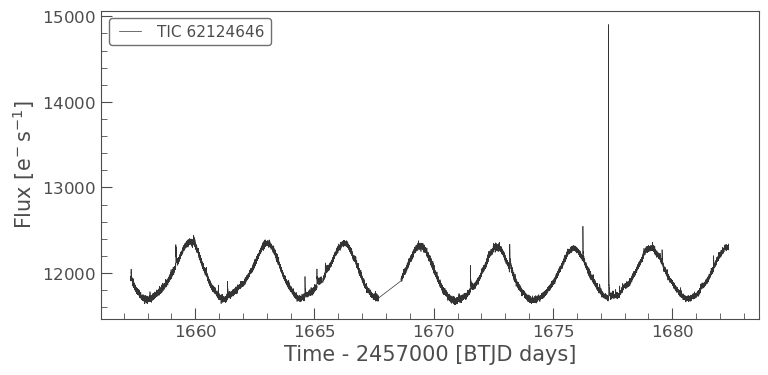

In [6]:
from lightkurve.search import search_lightcurvefile

lc = search_lightcurvefile(target='tic62124646', mission='TESS', sector=13)
lc = lc.download().PDCSAP_FLUX
lc.plot()

In [7]:
cnn.predict(modelname=MODELS[0],
            times=lc.time.to_value(format='mjd'),
            fluxes=lc.flux,
            errs=lc.flux_err)
single_pred = cnn.predictions[0]

2024-08-02 12:03:45.944922: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
  0%|          | 0/1 [00:00<?, ?it/s]

533/533 [==============================] - 1s 1ms/step


100%|██████████| 1/1 [00:01<00:00,  1.57s/it]


In [8]:
cnn.model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 200, 16)           64        
                                                                 
 max_pooling1d (MaxPooling1D  (None, 100, 16)          0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 100, 16)           0         
                                                                 
 conv1d_1 (Conv1D)           (None, 100, 64)           3136      
                                                                 
 max_pooling1d_1 (MaxPooling  (None, 50, 64)           0         
 1D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 50, 64)            0

Text(0.5, 1.0, 'TIC 62124646')

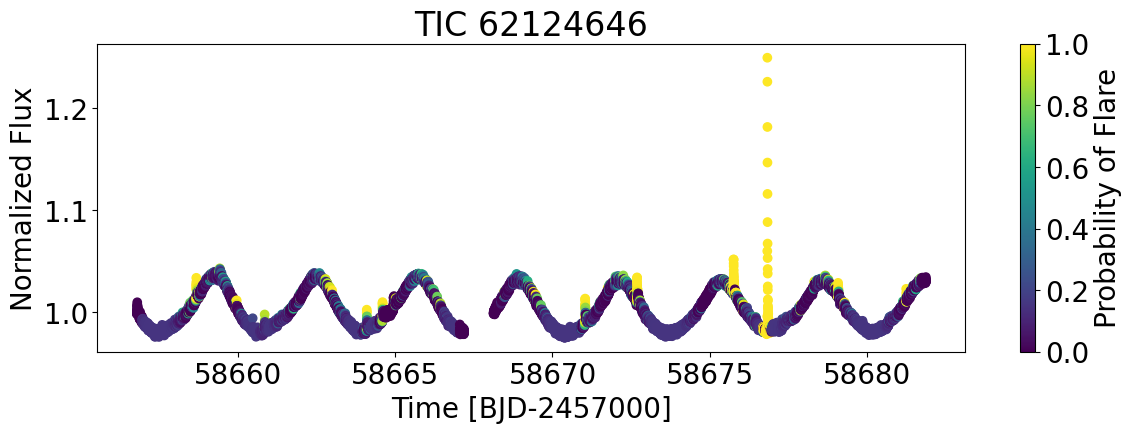

In [9]:
plt.figure(figsize=(14,4))
plt.scatter(cnn.predict_time[0], cnn.predict_flux[0],
            c=single_pred, vmin=0, vmax=1)
plt.colorbar(label='Probability of Flare')
plt.xlabel('Time [BJD-2457000]')
plt.ylabel('Normalized Flux')
plt.title('TIC {}'.format(lc.targetid))

In [10]:
preds = np.zeros((len(MODELS),len(cnn.predictions[0])))

for i, model in enumerate(MODELS):
    cnn.predict(modelname=model,
                times=lc.time.to_value(format='mjd'),
                fluxes=lc.flux,
                errs=lc.flux_err)
    preds[i] = cnn.predictions[0]

avg_pred = np.nanmedian(preds, axis=0)

  0%|          | 0/1 [00:00<?, ?it/s]

533/533 [==============================] - 1s 1ms/step


  0%|          | 0/1 [00:00<?, ?it/s]

533/533 [==============================] - 1s 1ms/step


  0%|          | 0/1 [00:00<?, ?it/s]

533/533 [==============================] - 1s 1ms/step


  0%|          | 0/1 [00:00<?, ?it/s]

533/533 [==============================] - 1s 1ms/step


  0%|          | 0/1 [00:00<?, ?it/s]

533/533 [==============================] - 1s 1ms/step


  0%|          | 0/1 [00:00<?, ?it/s]

533/533 [==============================] - 1s 1ms/step


  0%|          | 0/1 [00:00<?, ?it/s]

533/533 [==============================] - 1s 1ms/step


  0%|          | 0/1 [00:00<?, ?it/s]

533/533 [==============================] - 1s 1ms/step


  0%|          | 0/1 [00:00<?, ?it/s]

533/533 [==============================] - 1s 1ms/step


  0%|          | 0/1 [00:00<?, ?it/s]

533/533 [==============================] - 1s 1ms/step


100%|██████████| 1/1 [00:01<00:00,  1.39s/it]


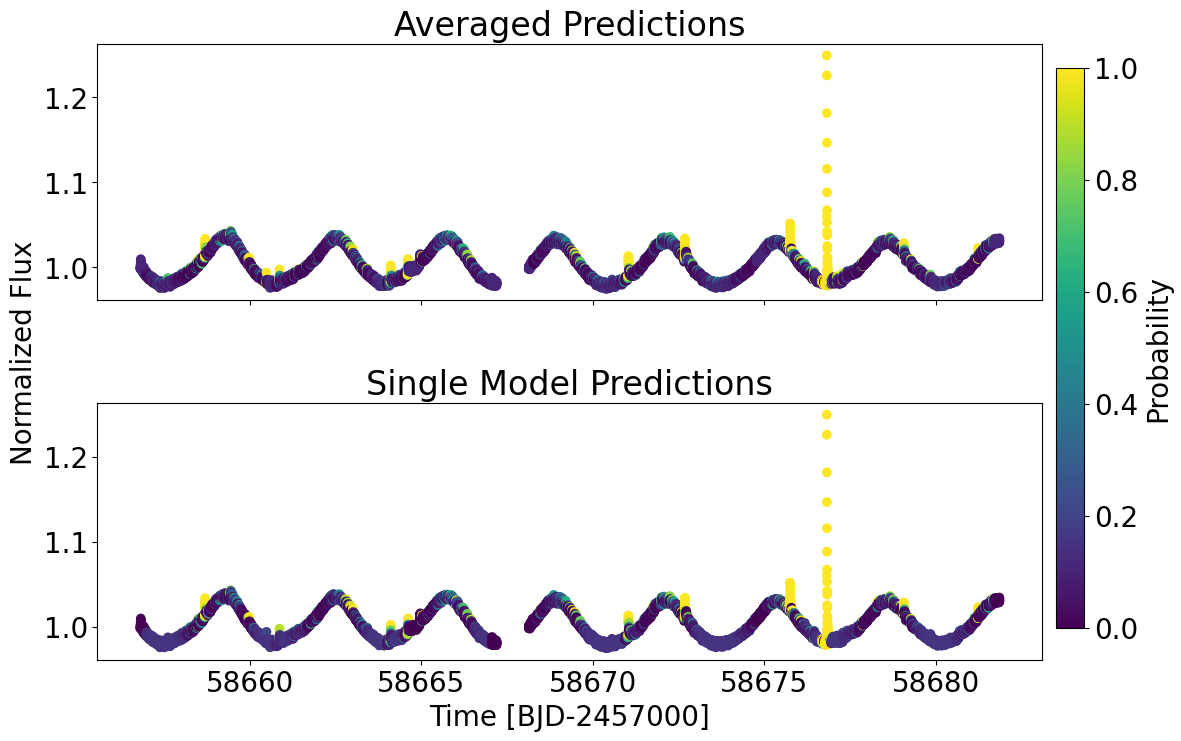

In [11]:
fig, (ax1, ax2) = plt.subplots(figsize=(14,8), nrows=2,
                               sharex=True, sharey=True)
im = ax1.scatter(cnn.predict_time[0], cnn.predict_flux[0],
            c=avg_pred, vmin=0, vmax=1)
ax2.scatter(cnn.predict_time[0], cnn.predict_flux[0],
            c=single_pred, vmin=0, vmax=1)
ax2.set_xlabel('Time [BJD-2457000]')
ax2.set_ylabel('Normalized Flux', y=1.2)

fig.subplots_adjust(right=0.8)
cbar_ax = fig.add_axes([0.81, 0.15, 0.02, 0.7])
fig.colorbar(im, cax=cbar_ax, label='Probability')


ax1.set_title('Averaged Predictions')
ax2.set_title('Single Model Predictions')

plt.subplots_adjust(hspace=0.4)